In [54]:
# Import the datamodule
from anomalib.data import Folder
from anomalib.data.utils import TestSplitMode, ValSplitMode
import os

train_dirs = {
    "train": "/mnt/dataset/MoNuSeg/patches_valid_inst_128x128_128x128/__ResNet50_umap_n_components_3_random_state_42_hdbscan_min_samples_10_min_cluster_size_50_v1.2/6/MoNuSegTrainingData/",
}

# Create the datamodule
datamodule_train = Folder(
    name="monuseg",
    root=train_dirs['train'],
    normal_dir="images",
    task="segmentation",
    test_split_mode = TestSplitMode.NONE,
    val_split_mode = ValSplitMode.FROM_TRAIN,
    image_size=(128, 128)
)

# Setup the datamodule
datamodule_train.setup()


In [55]:
# Import the model and engine
from anomalib.models import Patchcore
from anomalib.engine import Engine

# Create the model and engine
model = Patchcore()
engine = Engine(task="segmentation")



In [56]:
# Train a Patchcore model on the given datamodule
engine.train(datamodule=datamodule_train, model=model)


Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/anomalib_monuseg/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:182: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model                 │ PatchcoreModel           │ 24.9 M │ train │
│ 1 │ _transform            │ Compose                  │      0 │ train │
│ 2 │ normalization_metrics │ MinMax                   │      0 │ train │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │ train │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │ train │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │ train │
└───┴───────────────────────┴──────────────────────────┴────────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99

Output()

Output()

WARNING:root:The validation set does not contain any anomalous images. As a result, the adaptive threshold will 
take the value of the highest anomaly score observed in the normal validation images, which may lead to poor 
predictions. For a more reliable adaptive threshold computation, please add some anomalous images to the validation
set.

/opt/conda/envs/anomalib_monuseg/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No 
positive samples found in target, recall is undefined. Setting recall to one for all thresholds.
  warnings.warn(*args, **kwargs)  # noqa: B028

WARNING:root:The validation set does not contain any anomalous images. As a result, the adaptive threshold will 
take the value of the highest anomaly score observed in the normal validation images, which may lead to poor 
predictions. For a more reliable adaptive threshold computation, please add some anomalous images to the validation
set.

/opt/conda/envs/anomalib_monuseg/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No 
positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive 
score
  warnings.warn(*args, **kwargs)  # noqa: B028

`Trainer.fit` stopped: `max_epochs=1` reached.


WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/anomalib_monuseg/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:105: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


In [57]:
import glob

sdm_pardir = "/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/"
sdm_dirs = sorted(glob.glob(os.path.join(sdm_pardir, "v1.1_*")))

# Create the datamodule
datamodule_sdm = Folder(
    name="monuseg",
    root=sdm_pardir,
    normal_dir="samples",
    task="classification",
    image_size=(128, 128)
)

# datamodule_sdm.setup()



In [58]:
predictions = engine.predict(
    datamodule=datamodule_sdm,
    model=model,
    # ckpt_path="path/to/checkpoint.ckpt",
)


WARNING:anomalib.engine.engine:ckpt_path is not provided. Model weights will not be loaded.

WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

WARNING:anomalib.metrics.f1_score:F1Score class exists for backwards compatibility. It will be removed in v1.1. 
Please use BinaryF1Score from torchmetrics instead

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

In [59]:
predictions[0].keys()

dict_keys(['image_path', 'label', 'image', 'anomaly_maps', 'pred_scores', 'pred_labels', 'pred_masks', 'pred_boxes', 'box_scores', 'box_labels'])

In [62]:
print(predictions[0]['image_path'])
print(predictions[0]['pred_labels'])


['/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-50-5931-01Z-00-DX1_047.png', '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-A7-A13F-01Z-00-DX1_016.png', '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-AR-A1AK-01Z-00-DX1_052.png', '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-AR-A1AS-01Z-00-DX1_012.png', '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-AR-A1AS-01Z-00-DX1_054.png', '/mnt/dataset/MoNuSeg/out_sdm/patches_valid_128.32CH_1000st_1e-4lr_8bs_hvb_col_cos_clus6/v1.1_output_model_s1.5_050000/samples/TCGA-B0-5710-01Z-00-DX1_007.png', '/mnt/dataset/MoNuSeg/out_sdm/pat

In [68]:

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


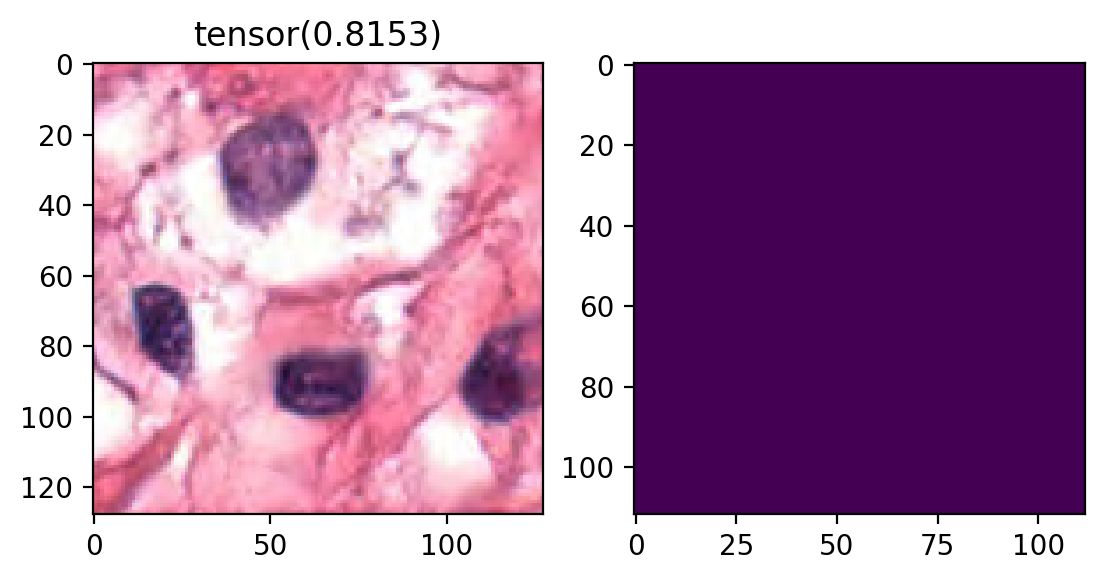

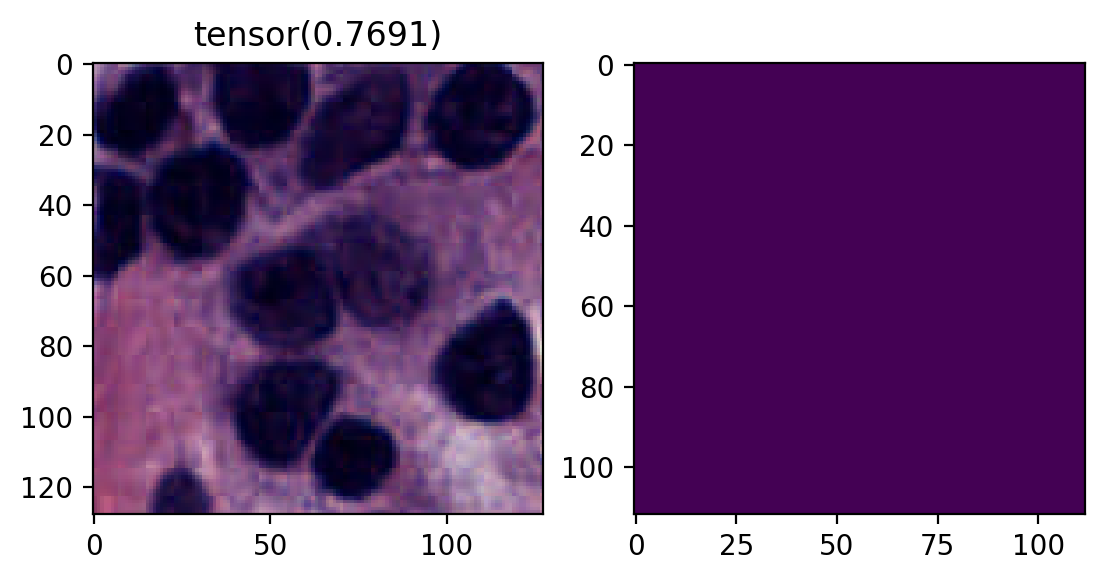

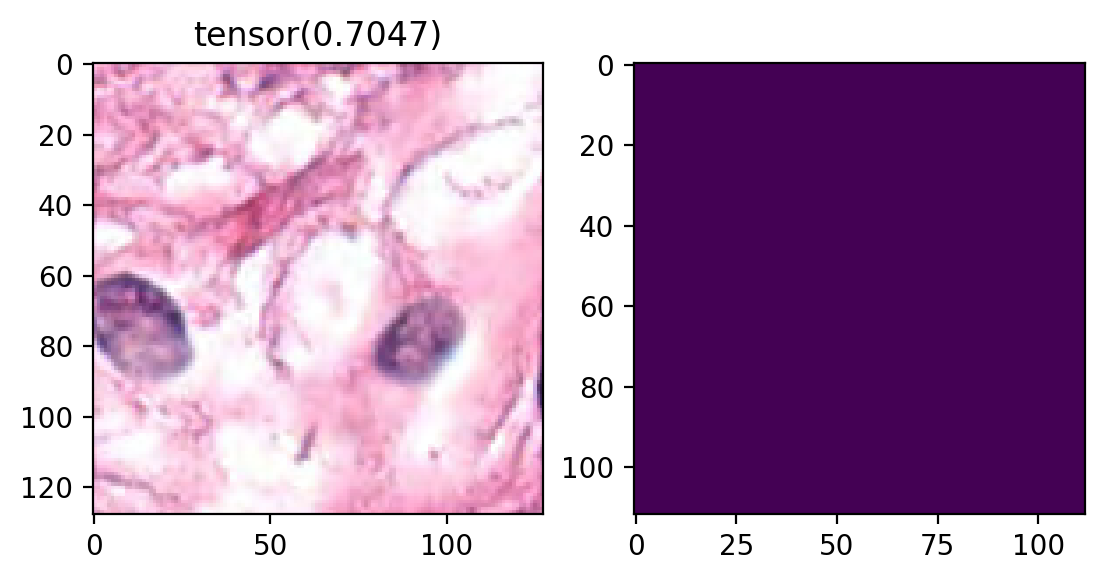

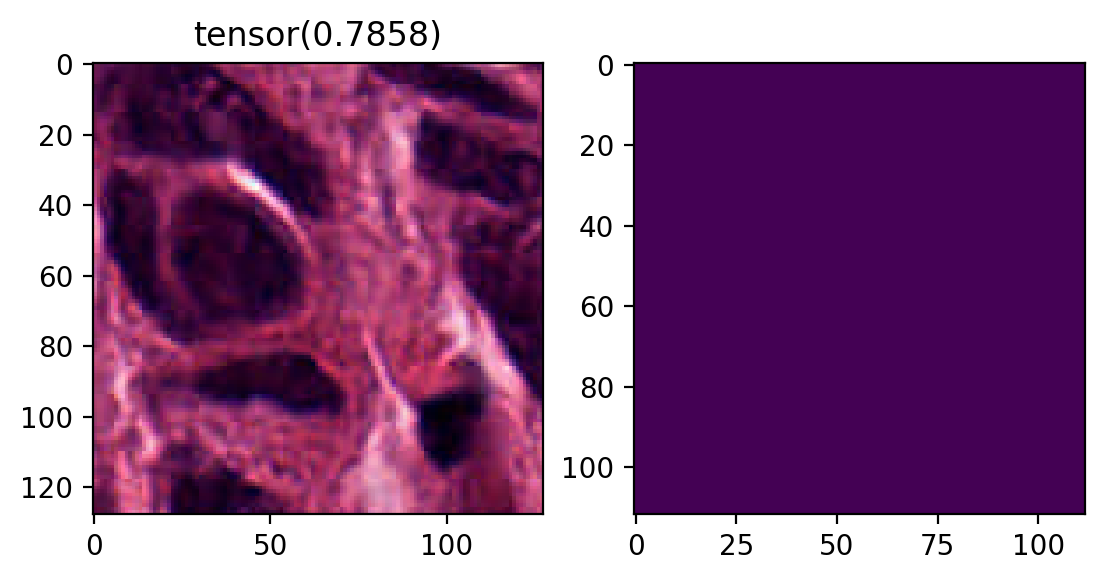

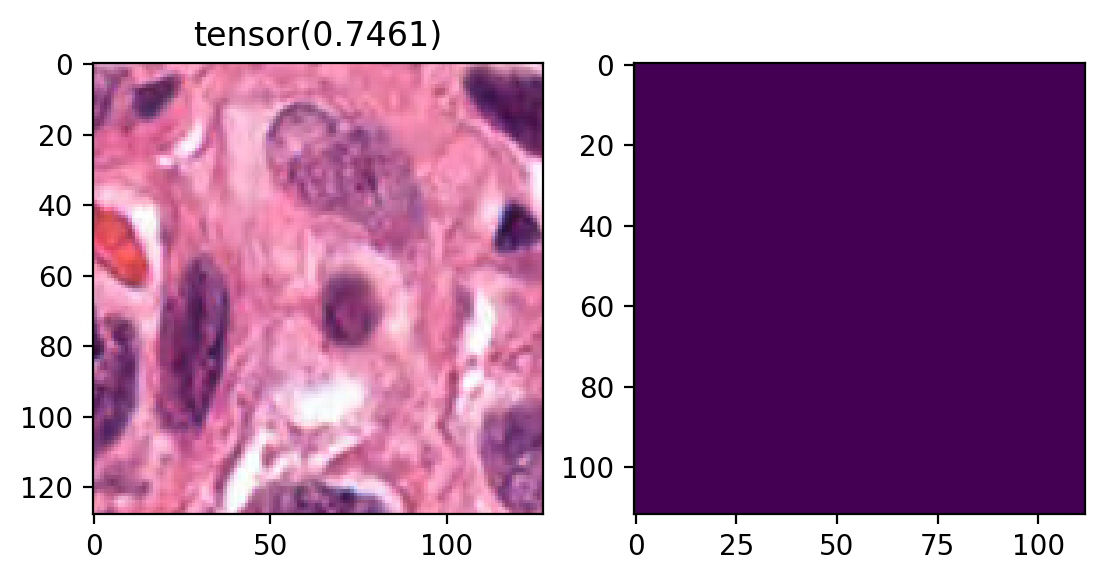

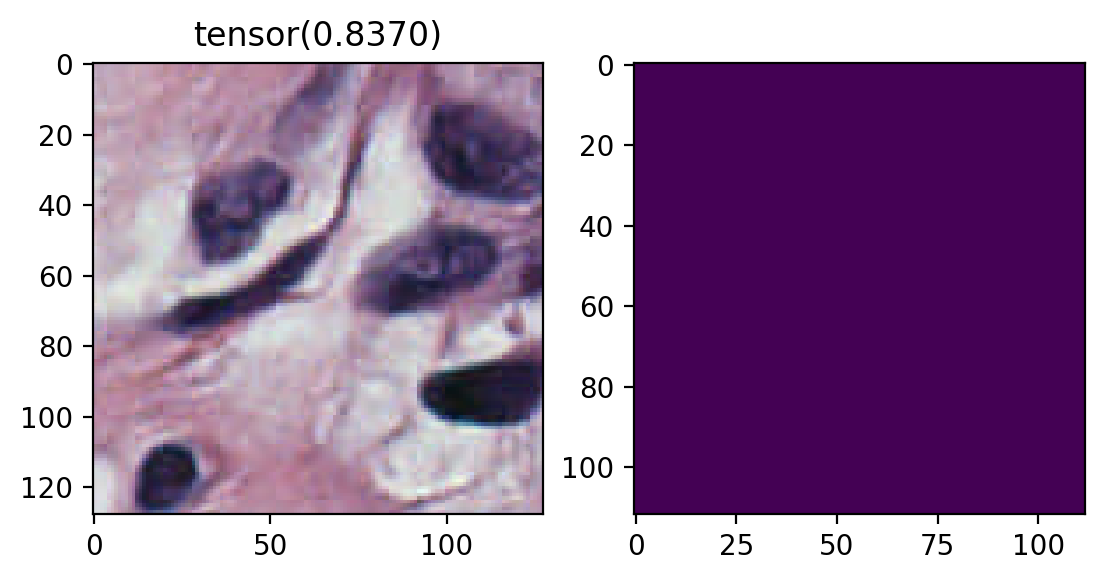

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time

for i in range(len(predictions[0]['image_path'])):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(np.array(Image.open(predictions[0]['image_path'][i])))
    ax[0].set_title(predictions[0]['pred_scores'][i])
    ax[1].imshow(predictions[0]['anomaly_maps'][i].squeeze())
    plt.show()

    time.sleep(5)


    




In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time

for i in range(len(predictions[0]['image_path'])):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(np.array(Image.open(predictions[0]['image_path'][i])))
    ax[0].set_title(predictions[0]['pred_scores'][i])
    ax[1].imshow(predictions[0]['anomaly_maps'][i].squeeze())
    plt.show()

    time.sleep(5)


    


